# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [github repo here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [ ]:
# !pip3 install transformers
# !pip3 install torch
# !pip3 install --upgrade pip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [7]:
#read the data

df = pd.read_csv('reviews_starbucks.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(850, 6)
(500, 6)


In [8]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [42]:
# df['id'] = range(1, len(df) + 1)

In [43]:
# columns = ['id', 'name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']
# df = df[columns]

In [44]:
df.head()

,id,name,location,Date,Rating,Review,Image_Links
0,1,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,2,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,3,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,5,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


## Quick EDA

In [45]:
df['Rating'].value_counts()

1.0    313
5.0     77
2.0     48
4.0     37
3.0     25
Name: Rating, dtype: int64

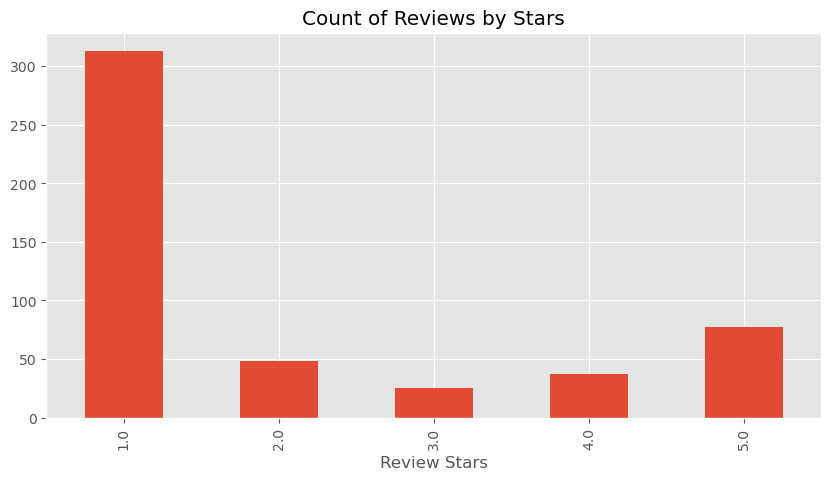

In [46]:
ax = df['Rating'].value_counts().sort_index()  \
     .plot(kind='bar', 
           title='Count of Reviews by Stars', 
           figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()

## Basic NLT 

In [47]:
example = df['Review'][50]
print(example)

Miserable customer service, executive department and website/apps. We have a Starbucks account where our payment method is linked to our account so we may earn stars for rewards. The Starbucks Cafe we go to is in a Market32/Price Chopper grocery store. Previously, every now and then purchase history shows with the $ amount, but no stars, shows as 0.0 earned. Then this started happening on a frequent basis. Called customer service, most speak English with a very broken accent. Explained the issue. 


### Tokenization:

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

Look at example below.

In [48]:
tokens = nltk.word_tokenize(example)
tokens[:5]

['Miserable', 'customer', 'service', ',', 'executive']

In [49]:
# nltk.download('averaged_perceptron_tagger') #got an error NLTK Lookup Error, so installed downloaded perception tagger

# POS Tagging with NLTK and Chunking in NLP
POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called grammatical tagging.

Steps Involved in the POS tagging example:
1. Tokenize text (word_tokenize)
2. apply pos_tag to above step that is nltk.pos_tag(tokenize_text)
https://www.guru99.com/pos-tagging-chunking-nltk.html

In [50]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Miserable', 'JJ'),
 ('customer', 'NN'),
 ('service', 'NN'),
 (',', ','),
 ('executive', 'NN'),
 ('department', 'NN'),
 ('and', 'CC'),
 ('website/apps', 'NN'),
 ('.', '.'),
 ('We', 'PRP')]

ne_chunk: Use NLTK's currently recommended named entity chunker to chunk the given list of tagged tokens.

The ne_chunk() function processes a list of POS-tagged tokens as input and produces a tree of named entities as output. 
It represents the tree as a nested list of tuples, where each tuple signifies a named entity and includes the entity’s 
label along with a list of the words containing the entity.

For instance, the label for geographical location is “GPE,” and it represents the named entity “New York,” such as in the tuple (“GPE”, “New York”).

In [51]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

#What is Pprint used for?
The pprint module in Python is a utility module that you can use to print data structures in a readable, pretty way.

In [52]:
entities = nltk.chunk.ne_chunk(tagged) 
entities.pprint()

(S
  (GPE Miserable/JJ)
  customer/NN
  service/NN
  ,/,
  executive/NN
  department/NN
  and/CC
  website/apps/NN
  ./.
  We/PRP
  have/VBP
  a/DT
  Starbucks/NNP
  account/NN
  where/WRB
  our/PRP$
  payment/NN
  method/NN
  is/VBZ
  linked/VBN
  to/TO
  our/PRP$
  account/NN
  so/IN
  we/PRP
  may/MD
  earn/VB
  stars/NNS
  for/IN
  rewards/NNS
  ./.
  The/DT
  (FACILITY Starbucks/NNP Cafe/NNP)
  we/PRP
  go/VBP
  to/TO
  is/VBZ
  in/IN
  a/DT
  Market32/Price/NNP
  Chopper/NNP
  grocery/NN
  store/NN
  ./.
  Previously/RB
  ,/,
  every/DT
  now/RB
  and/CC
  then/RB
  purchase/VB
  history/NN
  shows/NNS
  with/IN
  the/DT
  $/$
  amount/NN
  ,/,
  but/CC
  no/DT
  stars/NNS
  ,/,
  shows/VBZ
  as/IN
  0.0/CD
  earned/VBD
  ./.
  Then/RB
  this/DT
  started/VBD
  happening/VBG
  on/IN
  a/DT
  frequent/JJ
  basis/NN
  ./.
  Called/VBN
  customer/NN
  service/NN
  ,/,
  most/JJS
  speak/JJ
  English/JJ
  with/IN
  a/DT
  very/RB
  broken/JJ
  accent/NN
  ./.
  Explained/VBD
  the/DT

# Step 1. Vader Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

* This used a 'bag of words' approach:
  1. Stop words are removed
  2. Each word is sorted and combined to a total score.

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

siri = SentimentIntensityAnalyzer()

In [54]:
siri

In [55]:
siri.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [56]:
siri.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [57]:
siri.polarity_scores(example)

{'neg': 0.112, 'neu': 0.864, 'pos': 0.024, 'compound': -0.8146}

In [59]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['id']
    res[myid] = siri.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [60]:
res[1]

{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.8991}

In [61]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.0990,0.0870,0.0530,0.0000,0.1090,0.2330,0.0330,0.1960,0.2100,...,0.1450,0.0550,0.0190,0.1370,0.0300,0.0260,0.2620,0.0910,0.1400,0.1640
neu,0.7970,0.7550,0.7670,0.6820,0.6690,0.8910,0.7670,0.8180,0.8040,0.6490,...,0.8550,0.9180,0.8910,0.7790,0.8080,0.6810,0.5920,0.8790,0.8600,0.8360
pos,0.2030,0.1450,0.1450,0.2650,0.3310,0.0000,0.0000,0.1500,0.0000,0.1410,...,0.0000,0.0260,0.0900,0.0840,0.1620,0.2930,0.1460,0.0300,0.0000,0.0000
compound,0.8991,0.7766,0.5242,0.9698,0.9793,-0.7269,-0.8963,0.8994,-0.8316,-0.7912,...,-0.7981,-0.5994,0.7414,-0.5092,0.9705,0.9441,-0.8681,-0.5586,-0.4168,-0.8481


In [66]:
df.head(5)

,id,name,location,Date,Rating,Review,Image_Links
0,1,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,2,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,3,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,5,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [67]:
# vaders = pd.DataFrame(res).T #transform
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left')

In [72]:
# Now we have sentiment scores and metadata
vaders.head()

,id,neg,neu,pos,compound,name,location,Date,Rating,Review,Image_Links
0,1,0.000,0.797,0.203,0.8991,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,2,0.099,0.755,0.145,0.7766,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,3,0.087,0.767,0.145,0.5242,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,0.053,0.682,0.265,0.9698,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,5,0.000,0.669,0.331,0.9793,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


# Plot VADER results

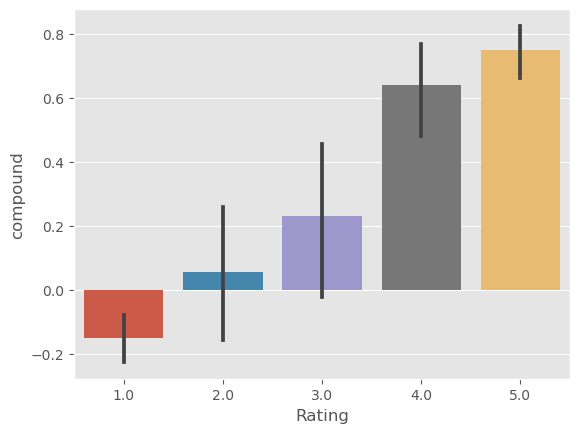

In [74]:
sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Rating by Starbucks Star Reviews')
plt.show()

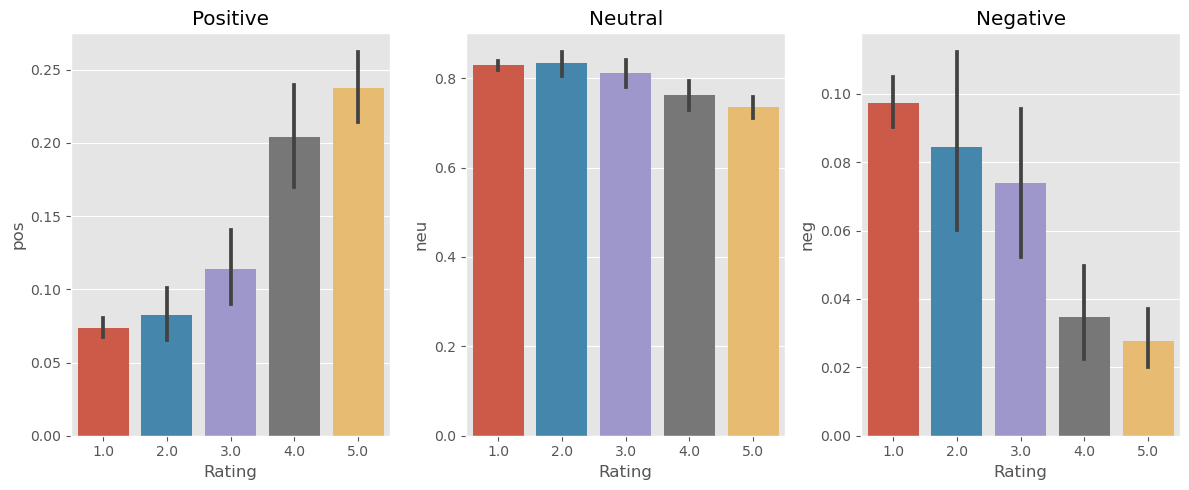

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3: Roberta Pretrained Model

* Use a model trained of a large corpus of data
* Transformer model accounts for the worlds but also the context related to other words.

In [77]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [78]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [79]:
# VADER results on example
print(example)
siri.polarity_scores(example)

Miserable customer service, executive department and website/apps. We have a Starbucks account where our payment method is linked to our account so we may earn stars for rewards. The Starbucks Cafe we go to is in a Market32/Price Chopper grocery store. Previously, every now and then purchase history shows with the $ amount, but no stars, shows as 0.0 earned. Then this started happening on a frequent basis. Called customer service, most speak English with a very broken accent. Explained the issue. 


{'neg': 0.112, 'neu': 0.864, 'pos': 0.024, 'compound': -0.8146}

In [84]:
# Run the Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
rating = output[0][0].detach().numpy()
rating = softmax(rating)
rating_dict = {
    'roberta_neg' : rating[0],
    'roberta_neu' : rating[1],
    'roberta_pos' : rating[2]
}
print(rating_dict)

{'roberta_neg': 0.6870555, 'roberta_neu': 0.29122382, 'roberta_pos': 0.021720642}


In [85]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : rating[0],
        'roberta_neu' : rating[1],
        'roberta_pos' : rating[2]
    }
    return rating_dict

In [ ]:
# RuntimeError: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 
# 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]

# we will skip those for which size of text is too big for the model

In [92]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        review = row['Review']
        myid = row['id']
        vader_result = siri.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [93]:
vader_result

{'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.8481}

In [94]:
roberta_result

{'roberta_neg': 0.6870555,
 'roberta_neu': 0.29122382,
 'roberta_pos': 0.021720642}

In [95]:
both

{'vader_neg': 0.164,
 'vader_neu': 0.836,
 'vader_pos': 0.0,
 'vader_compound': -0.8481,
 'roberta_neg': 0.6870555,
 'roberta_neu': 0.29122382,
 'roberta_pos': 0.021720642}

In [97]:
results_df = pd.DataFrame(res).T #transform
results_df = results_df.reset_index().rename(columns={'index':'id'})
results_df = results_df.merge(df, how='left')

In [98]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,name,location,Date,Rating,Review,Image_Links
0,1,0.000,0.797,0.203,0.8991,0.687056,0.291224,0.021721,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,2,0.099,0.755,0.145,0.7766,0.687056,0.291224,0.021721,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,3,0.087,0.767,0.145,0.5242,0.687056,0.291224,0.021721,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,4,0.053,0.682,0.265,0.9698,0.687056,0.291224,0.021721,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,5,0.000,0.669,0.331,0.9793,0.687056,0.291224,0.021721,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


# Compare scores between models

In [99]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'name', 'location', 'Date',
       'Rating', 'Review', 'Image_Links'],
      dtype='object')

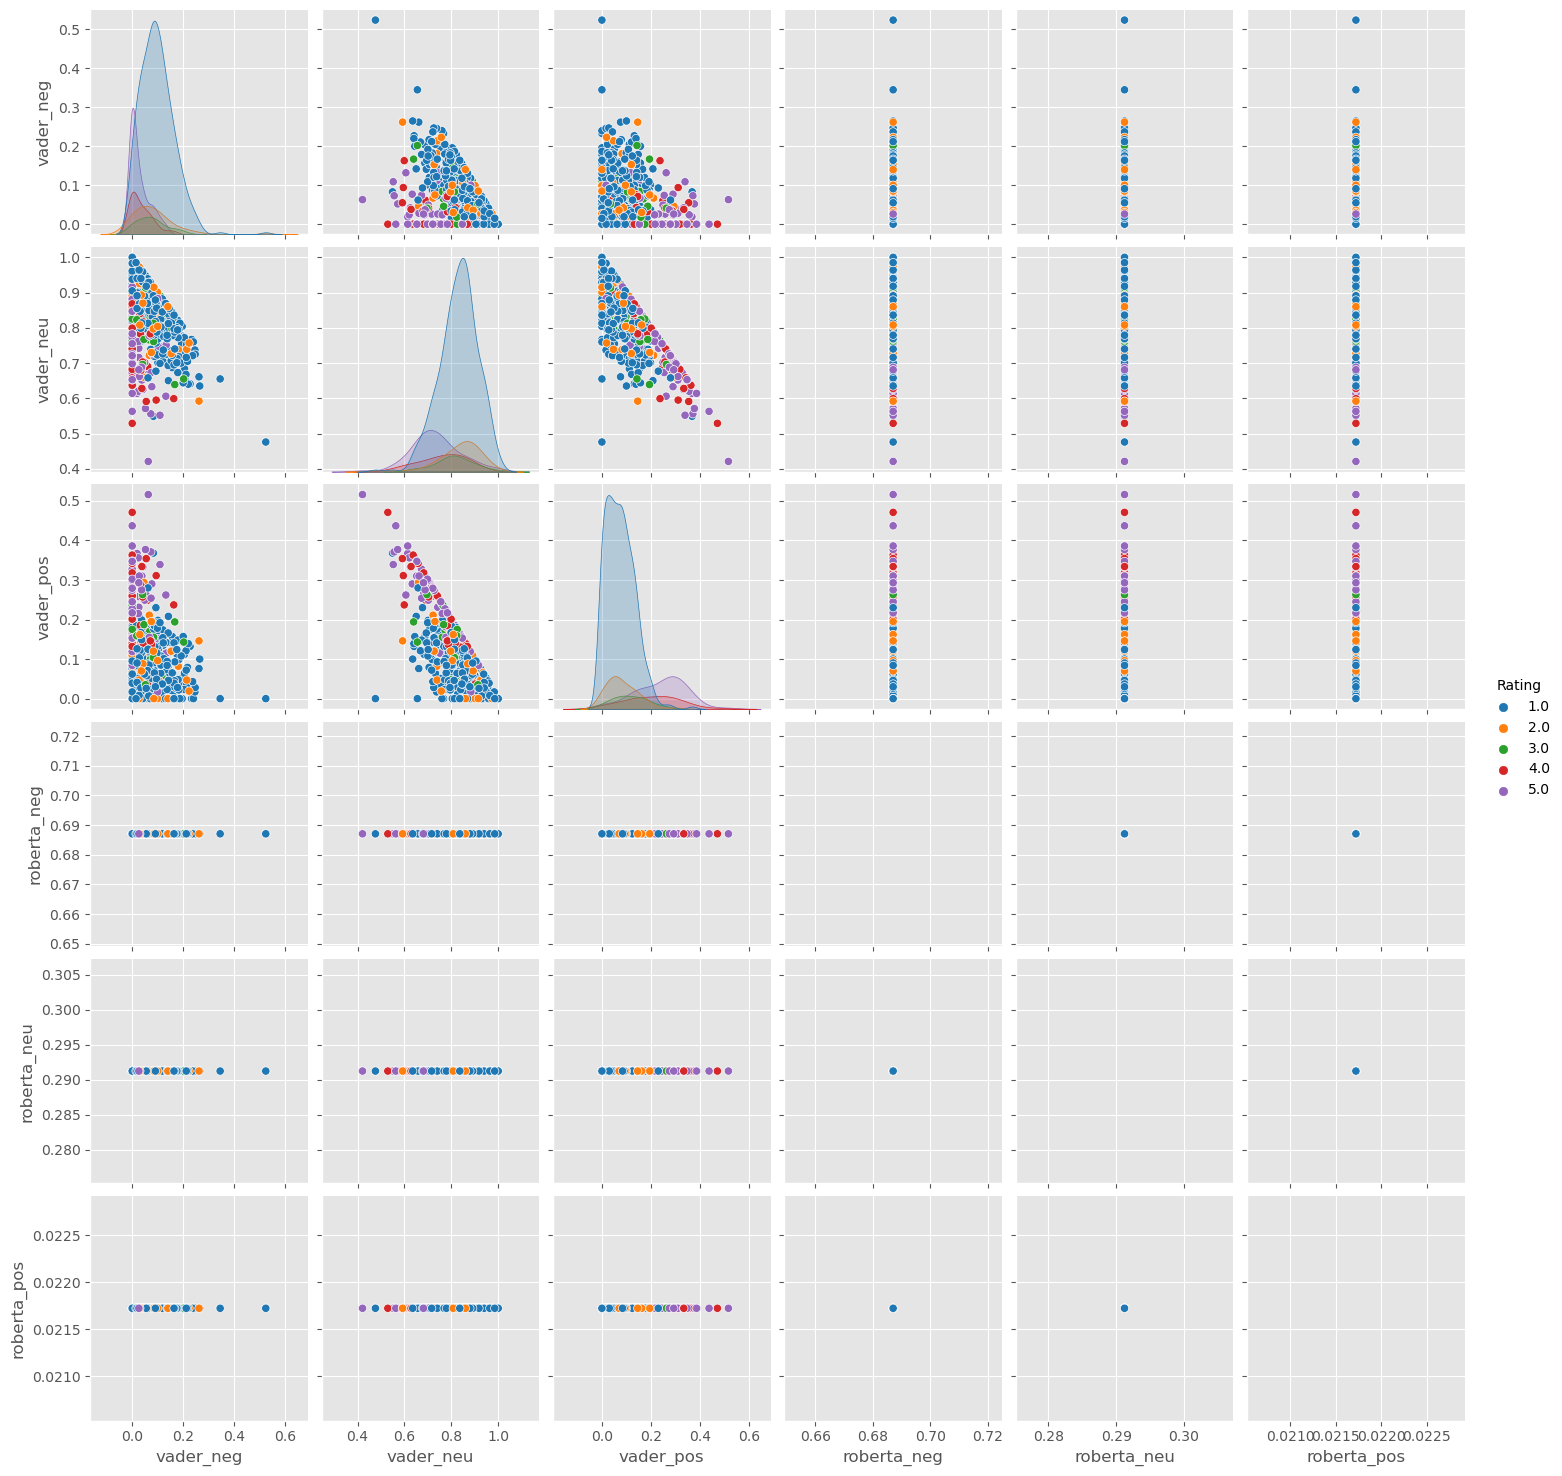

In [102]:
sns.pairplot(data=results_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos', 
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue ='Rating',
            palette='tab10')
plt.show()

# Step 4: Review Examples

* Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [104]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'We had to correct them on our order 3 times. They never got it right then the manager came over to us and said we made her employee uncomfortable because we were trying to correct our order. The manager tried was racist against my stepmom (Chinese) taking over her but when I (**) would talk she would stop talking and listen to me.'

In [105]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

"I have been a loyal customer for 10+ yrs...however, I've won multiple prizes on the most recent Starbucks app game but the prizes don't get delivered to my account. Customer service didn't know how to help. I've spent money to play the game trying to win prizes but never see the prizes that I've already won. FRAUD!!! Don't fall for it screenshots don't help either. It needs the reward to be displayed as in barcode scan. I'm not spending in Starbucks anymore. Its brand of integrity is very poor."

In [106]:
# negative 5-star review

In [107]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

'Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.'

In [108]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

'I personally love Starbucks! I don’t usually get it that often but when I do I always get the same thing. I get a caramel frappe. Now here is the thing when you go to certain Starbucks locations. I usually go to the same one every time so they know my order, but when I go to a more convenient one for a quick drink they always mess up my order. That is not really a big deal but when they start getting angry with me I get upset. I can understand where they are coming from. But I always want to try something new but I am not sure if I will like it. And it would be a waste of money to buy something and not like it. I wish there was a way that you could sample a drink for free or little charge.'

# Extra: The Transformers Pipeline
* Quick and easy way to run sentiment predictions

In [109]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [110]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [111]:
sent_pipeline('I do not love sentiment analysis!')

[{'label': 'NEGATIVE', 'score': 0.997802197933197}]

In [114]:
sent_pipeline('We had to correct them on our order 3 times. They never got it right then the manager \
              came over to us and said we made her employee uncomfortable because we were trying to correct our order. \
              The manager tried was racist against my stepmom (Chinese) taking over her but when I (**) would talk she \
              would stop talking and listen to me.')

[{'label': 'NEGATIVE', 'score': 0.9990606904029846}]

In [113]:
sent_pipeline('Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. \
              There is always a smile in their voice when they greet you at the drive-thru. And their customer \
              service is always spot-on, they always get my order right and with a smile. I would actually give \
              them more than 5 stars if they were available.')

[{'label': 'POSITIVE', 'score': 0.9998542070388794}]

# The End. Thank You!